In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [19]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [23]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [24]:
# Impute missing values in 'oldpeak' column with the median
median_oldpeak = df['oldpeak'].median()
df['oldpeak'].fillna(median_oldpeak, inplace=True)


In [25]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [27]:
df.dtypes


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [28]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


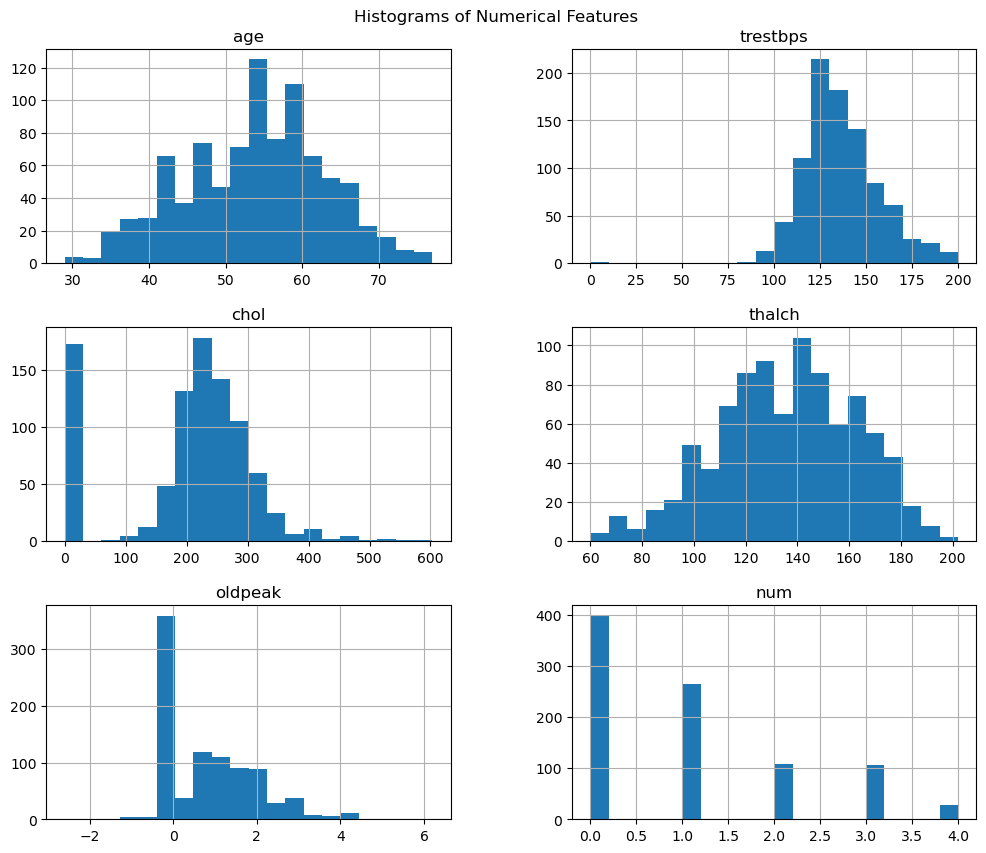

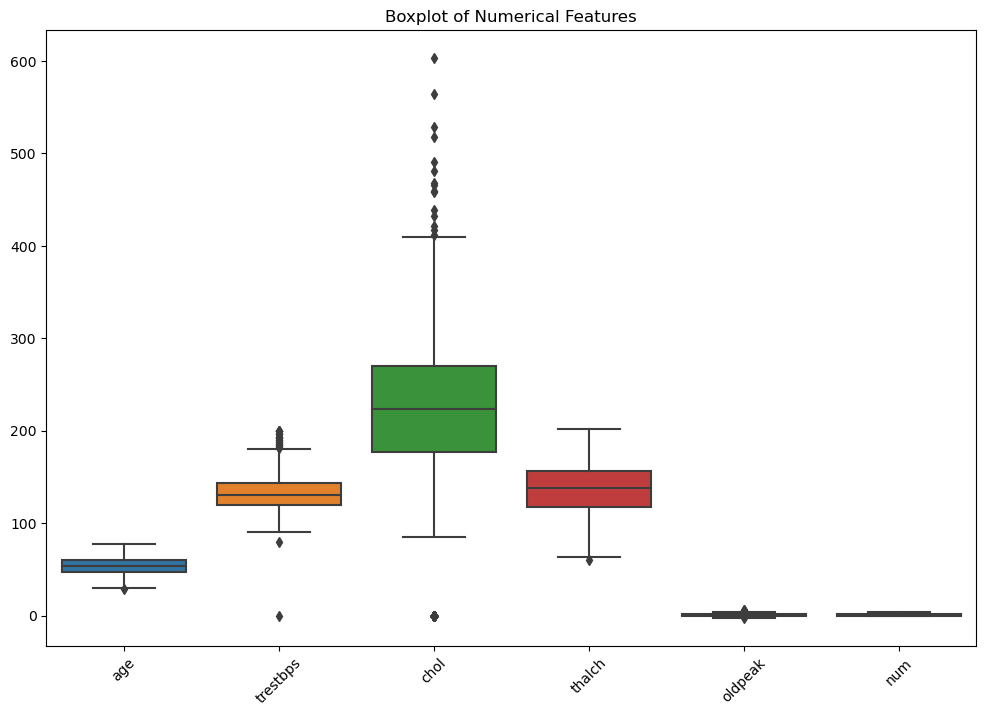

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", x=0.5, y=0.92)
plt.show()


# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


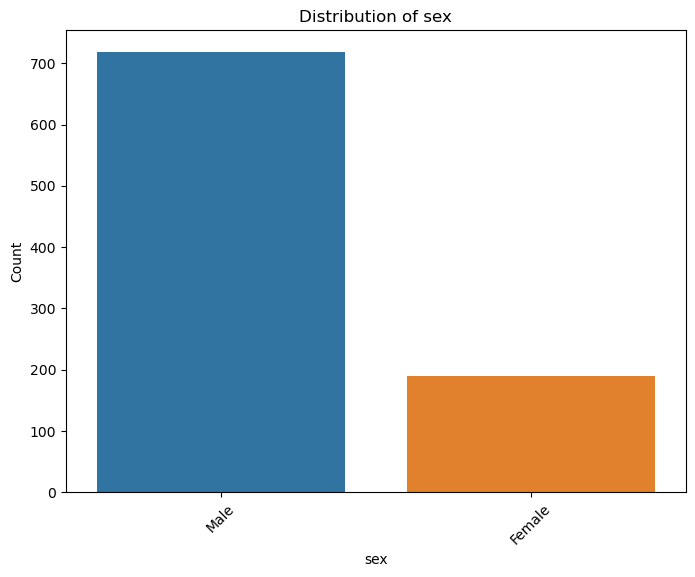

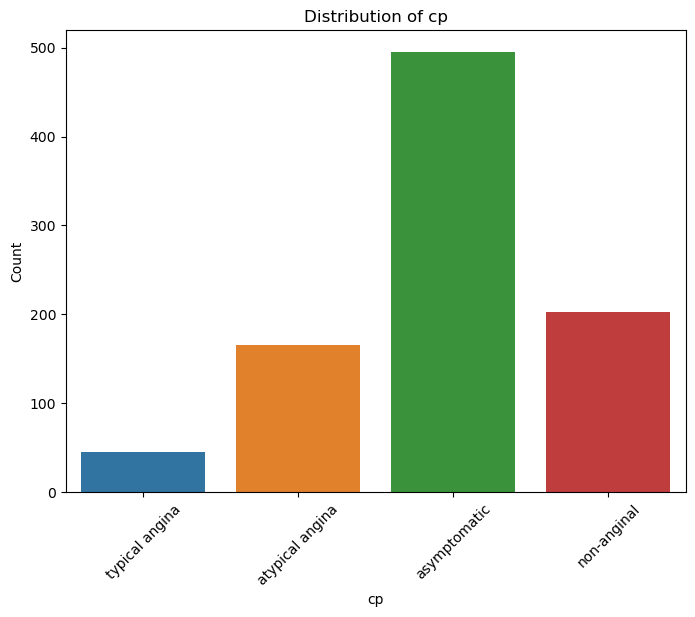

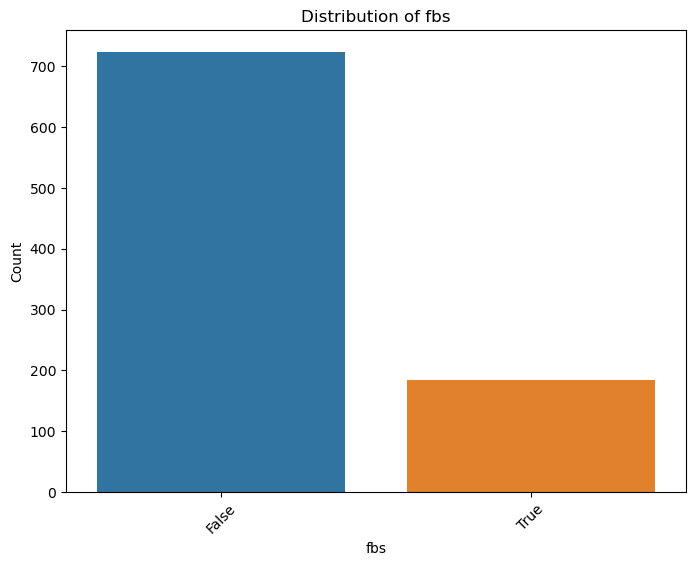

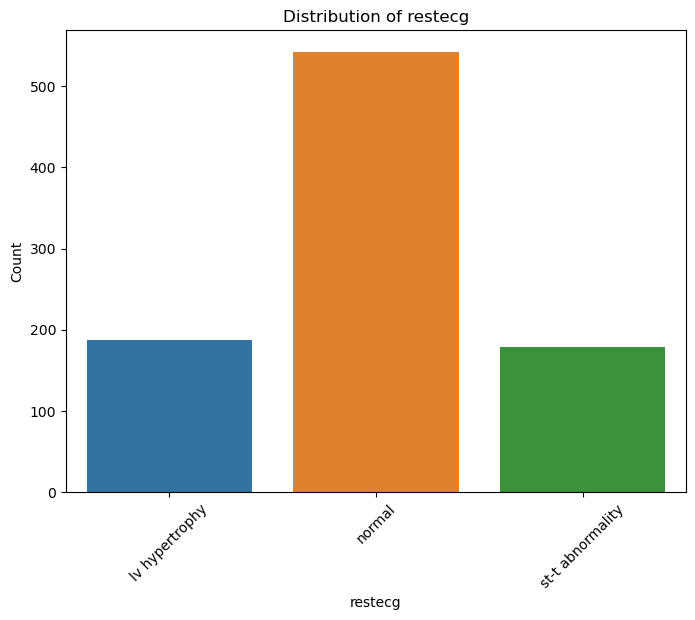

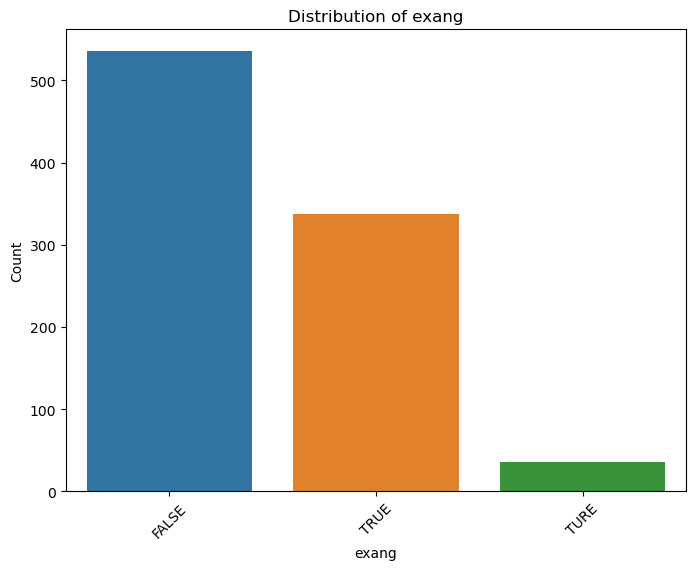

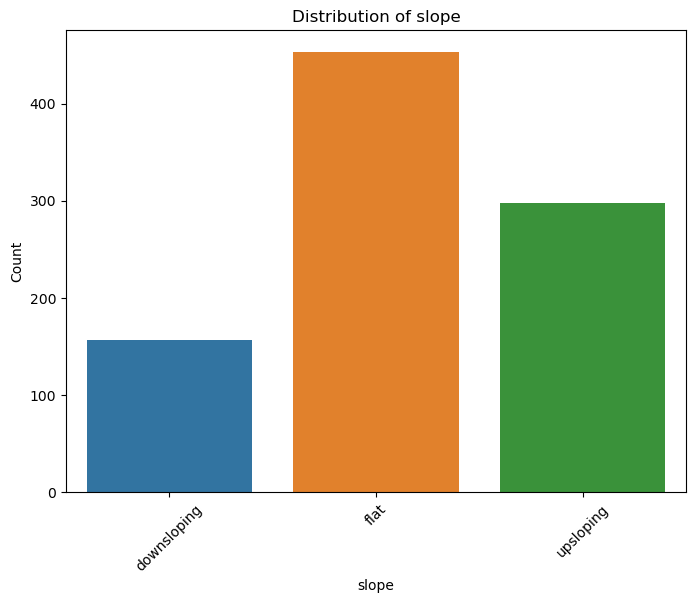

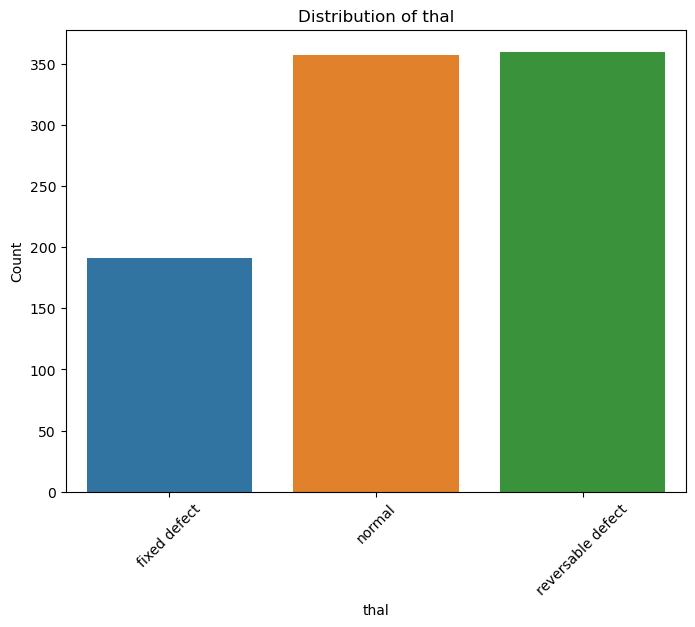

In [31]:
# Count plots
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\Reshma\AppData\Local\Temp\ipykernel_20604\1445751156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


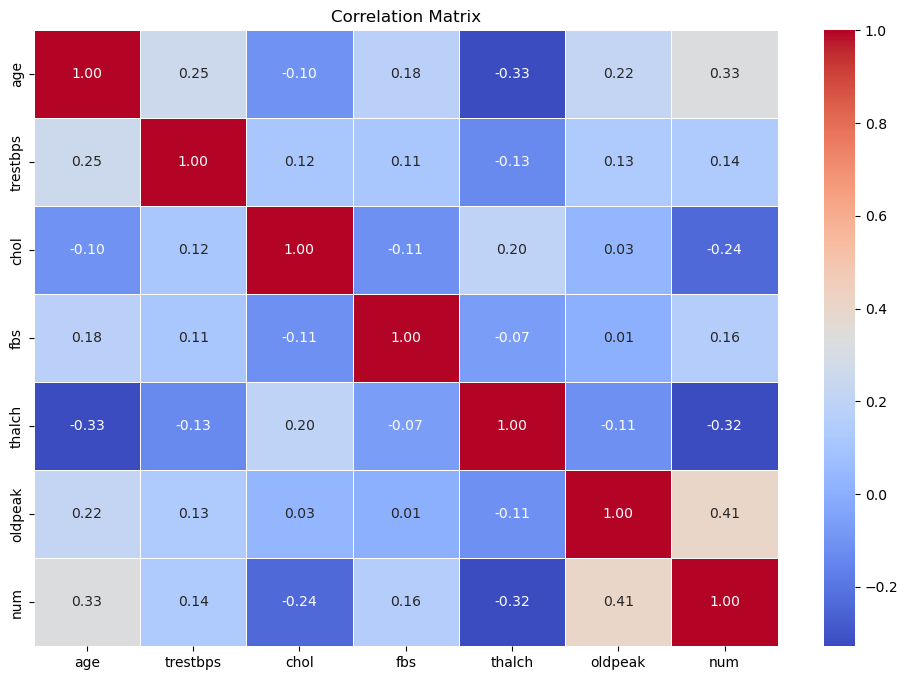

In [32]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [36]:
import pandas as pd

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

# Dictionary to store outliers for each column
outliers_dict = {}

# Detect outliers for each column
for column in columns:
    outliers_dict[column] = detect_outliers(df, column)

# Display the outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")



Outliers in age:
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  FALSE      0.0  upsloping  normal    0  


Outliers in trestbps:
     age     sex               cp  trestbps  chol    fbs           restecg  \
190   53    Male     asymptomatic        80     0   True            normal   
243   39    Male  atypical angina       190   241  False            normal   
383   63  Female  atypical angina       181     0  False            normal   
384   74    Male      non-anginal       188     0  False            normal   
387   45    Male      non-anginal       193   236  False            normal   
396   55    Male      non-anginal       196   406  False  st-t abnormality   
487   54    Male  atypical angina       192   283  False    lv hypertrophy   
488   63    Male     asymptomatic       185     0  False            normal   


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Convert categorical variables to numerical format
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp'] = label_encoder.fit_transform(df['cp'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['exang'] = label_encoder.fit_transform(df['exang'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])

# Split the data into features and target variable
X = df.drop(columns=['num'])
y = df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 51.65%


In [6]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Convert categorical variables to numerical format
# Skip this step as RandomForest can handle categorical variables directly


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train the RandomForest model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 59.34%


In [11]:
# Retain only the top features and convert back to DataFrame
X_train_selected = pd.DataFrame(X_train_scaled, columns=X.columns)[top_features]
X_test_selected = pd.DataFrame(X_test_scaled, columns=X.columns)[top_features]

# Train the RandomForest model with selected features
best_rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")


Accuracy after feature selection: 59.34%


In [10]:
'''def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df

# List of columns to check for outliers
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

# Handle outliers for each column
for column in columns:
    df = handle_outliers(df, column)
'''

KeyError: 'thalach'